## Predição de Turnover em RH - Churn de Pessoal


<img src= "../imagens/turnover01.jpg"  width="600" align="left">

---

### 1 - Problema:

**Rotatividade de Pessoal** nas empresas é uma questão complexa, seja pelo prejuízo que ela traz com a rotatividade de funcionários, seja pela perda de capital intelectual e talentos, seja pela falta do profissional e seu impacto na rotina da empresa.
Em cenários mais complicados podem surgir dificuldades como falta de oferta do profissional no mercado, encontrar o perfil adequado à cultura da Empresa e/ou especificidades da função, dos projetos da Empresa ou da experiência requerida do colaborador, entre outras.

Em um cenário real é fundamental **conhecer o contexto de negócio da empresa** para apoiar a análise dos dados e ser usado como referência na busca de informações complementares que enriqueçam o entendimento do problema: em qual o **segmento atua**? É uma **empresa global**? Qual o nível de especialização da mão de obra? Qual o comportamento de turnover nos concorrentes?

#### 1.1 - Impactos do Turnover

<img src= "../imagens/turnover03.png"  alt="Impacto financeiro do Turnover" width="20%" align="left">

Os custos do processo de desligamento são altos e de natureza direta ou indireta*, mas além da demissão (encargos, saldos de valores devidos, FGTS e eventualmente questões processuais), a admissão de novos funcionários (recrutamento, seleção, treinamento, passagem de conhecimento específico de processos e ferramentas), assim como a sua manutenção envolve gastos relevantes, portanto uma maneira de prever que funcionários podem estar prestes a deixar a empresa (causando o chamado turnover ) e a oportunidade de evitar esse desembolso é de grande interesse.

\*Custos ***Indiretos*** relacionados à **ausência do funcionário antigo** ou a **contratação do novo**, como:
- Hora extra de funcionários da equipe em função do cargo vago;
- Horas de ausência do novo funcionário sendo treinado ou em integração;
- Dimuição de produtividade da equipe; etc.




Não obstante aos impactos financeiros, impactos de ordem social também ocorrem quando a rotatividade é alta e afetam sentimentos como os de bem estar, motivação e interferem em como as equipes se organizam para manter sua performace.

#### 1.2 - Objetivo da Predição e Análise

Como já foi mencionado antes, existe um considerável **impacto financeiro** e um reflexo direto nas **operações da empresa** em relação à rotatividade de pessoal, sendo uma questão que sobrecarrega o RH e causa desconforto no setor devido ao fato de não haver condições e/ou tempo hábil para renegociar a decisão do colaborador. Assim, prever esse fato pode aliviar as dores da empresa ao **prevenir a saída do colaborador ou pelo menos prepar a empresa para o impacto a ser gerado**.

Mas, além da **predição**, a **análise dos dados** disponíveis pode ser de grande utilidade na definição de medidas e políticas necessárias para reverter ou minimizar seus efeitos, assim como a criação de programas de recompensa visando a retenção de pessoal com base em descobertas que podem ser feitas a partir de perguntas levantadas de acordo com observações desses dados, explorando questões sobre como os funcionários sentem o local de trabalho: é aquilo que esperavam? Existe (in)compatibilidade entre o trabalho e o colaborador? O treinamento, capacitação e feedback dados são suficientes? E quanto às oportunidades de crescimento, valorização do colaborador, remuneração em relação ao mercado ou estresse de altas cargas de trabalho? Como anda a confiança e segurança em relação à suas lideranças?

### 2 - Estratégias e Soluções

Para prever a possibilidade de um colaborador deixar ou não a empresa, testaremos diveros algorítmos de classificação que irão gerar os modelos preditivos, embora inicialmente não seja apenas a seleção e teste de algorítimos que mostre qual a melhor escolha. Outros fatores como as características dos dados, ajustes nos parâmetros de entrada ou mesmo implementações do algorítimo com formulações matemáticas diferentes farão uma grande diferença na assertividade do modelo.  

Utilizaremos bases históricas dos últimos 5 anos extraídas exclusivamente de bancos de dados dos Sistemas de RH, portanto, de bases de dadoss estruturadas e obitidas com consultas SQL orientadas pelos Analistas de TI que atuam com os sistemas.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew, chisquare
import statsmodels.api as sm

### 3 - Carregando o Conjunto de Dados

Como Cientista de Dados devemos entender os cenários distintos de análise, problemática e fornecer a melhor estratégia possível como solução.

In [2]:
url_csv_hr = '../datasets/HR_Attrition.csv'
ds_funcionarios = pd.read_csv(url_csv_hr, encoding='utf8')

#### 3.1 - Reconhecimento da Base

In [4]:
ds_funcionarios.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### 3.1.1 - Explicando o Conjunto de Dados
O Dataset foi obtido de um repositório que atualmente não está mais disponível. Mas, conforme a explicação do material, esses são seus atributos:

- satisfaction_level: reflete a satisfação do funcionário variando de 0-1;
- last_evaluation: é o desempenho avaliado pelo empregador, que também varia de 0-1;
- number_projects: números de projetos
- average_monthly_hours: quantidade de horas médias trabalhadas por um funcionário em um mês;
- time_spent_company: experiência do funcionário expressa em anos na empresa;
- work_accident: se um funcionário sofreu um acidente de trabalho ou não;
- promotion_last_5years: se um funcionário teve alguma promoção nos últimos 5 anos ou não;
- department: Departamento / divisão de trabalho do funcionário;
- Salary: Nível salarial do funcionário definido com baixo, médio e alto (low, medium, high);
- **left**: o alvo da predição, ou seja, se o funcionário saiu da empresa ou não.

In [5]:
ds_funcionarios.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Com 14.999 registros (amostras) e 8 características (variáveis ou atributos), temos alguns dados relativos à amplitude e distribuição dos dados, mas existem campos numéricos que representam uma classificação (por exemplo, em "Work_accident" temos 0 = não e 1 = sim; da mesma forma acontece com "promotion_last_5years"), portanto é apenas um olhar superficial.

In [6]:
ds_funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Podemos notar que existem campos não-numéricos (object). Modelos de Machine Learning normalmente requerem que as variáveis de entrada e saída sejam numéricas. Abordaremos isso no momento oportuno, mas significa que existem dados  categóricos e teremos que codificá-los em números antes de criar, ajustar e avaliar um modelo.

Apenas antecipando nossa análise, existem pesquisas sugerindo que a rotatividade de funcionários é afetada por fatores como idade, estabilidade, nível salarial, satisfação no trabalho, condições de trabalho, potencial de crescimento e percepções de tratamento justo do funcionário.

Vamos analisar os dados sob a ótica do campo "left", ou seja, agrupando entre os que saíram da empresa e os que não saíram - este é o nosso **alvo de predição**, então vai receber a maior parte do foco em análise. Inicialmente vamos transformar o Dataset: alterar o valor e nome em colunas para melhorar a visibilidade na análise e olhar as médias desses grupos.

In [1]:
#Empacotando as rotinas de tratamento dos dados para Análise em uma classe
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

class PreparacaoDados:
    #Para facilitar a análise, apenas: alterando os valores para maior clareza de significado  
    def tratando_campos_categoricos(self, hr_datasource):
        hr_datasource = hr_datasource.copy()
        hr_datasource['left'] = hr_datasource['left'].apply(lambda lft: 'Nao' if lft == 0 else 'Sim')
        hr_datasource['Work_accident'] = hr_datasource['Work_accident'].apply(lambda wrk: 'Nao' if wrk == 0 else 'Sim')
        hr_datasource['promotion_last_5years'] = hr_datasource['promotion_last_5years'].apply(lambda p5y: 'Nao' if p5y == 0 else 'Sim')
        hr_datasource.rename(columns={'sales':'department'}, inplace=True)
        return hr_datasource
    
    #OneHot Encoder
    def tratamento_encoder(self, hr_datasource):
        encoder = preprocessing.OneHotEncoder()
        attrib_to_encode = ['salary','sales', 'number_project']
        ds_encoded = encoder.fit_transform(hr_datasource[attrib_to_encode]).toarray()
        return ds_encoded
    
    #Separação do conjunto de dados em suas variáveis independentes (X) e dependente (y)
    def compondo_datasets_x_y(self, ds_encoded, ds_hr):
        atributos_numericos = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
        # Juntando os DataFrames numérico e categórico:
        ds_X = pd.concat([ds_hr[atributos_numericos], pd.DataFrame(ds_encoded)], axis=1)
        ds_y = ds_hr['left']
        return ds_X, ds_y
    
    #Normalização
    def executa_min_scaler(self, dataSet):
        scaler = MinMaxScaler()
        ds_scalled = scaler.fit_transform(dataSet)
        return ds_scalled

In [8]:
#Criação do manipulador de atributos
preparador = PreparacaoDados()

In [9]:
ds_funcionario_temp = preparador.tratando_campos_categoricos(ds_funcionarios)
ds_funcionario_temp.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,Nao,Sim,Nao,sales,low
1,0.80,0.86,5,262,6,Nao,Sim,Nao,sales,medium
2,0.11,0.88,7,272,4,Nao,Sim,Nao,sales,medium
3,0.72,0.87,5,223,5,Nao,Sim,Nao,sales,low
4,0.37,0.52,2,159,3,Nao,Sim,Nao,sales,low
5,0.41,0.50,2,153,3,Nao,Sim,Nao,sales,low
6,0.10,0.77,6,247,4,Nao,Sim,Nao,sales,low
7,0.92,0.85,5,259,5,Nao,Sim,Nao,sales,low
8,0.89,1.00,5,224,5,Nao,Sim,Nao,sales,low
9,0.42,0.53,2,142,3,Nao,Sim,Nao,sales,low


In [10]:
#Agrupando os atributos em função de "y"
ds_left = ds_funcionario_temp.groupby('left')

#Sumarizando em função de ter saído ou não da empresa
left_count = ds_funcionario_temp.groupby('left').count()
totais = left_count.satisfaction_level

print("\n Quantidade de cada valor:",totais)
print('-----------------------------------')
print("\n Percentual de cada valor:",totais/len(ds_funcionario_temp)*100)


 Quantidade de cada valor: left
Nao    11428
Sim     3571
Name: satisfaction_level, dtype: int64
-----------------------------------

 Percentual de cada valor: left
Nao    76.191746
Sim    23.808254
Name: satisfaction_level, dtype: float64


Em números absolutos, 11.428 Funcionários dos dados coletados permaneceram na empresa, enquanto 3.571 deixaram a empresa. Em números relativos, 76,19% permaneceram na empresa e 23,81% a deixaram.

Melhor do que sumários numéricos, vizualizar esses dados é mais intuitivo para o entendimento e a anáilise das informações.

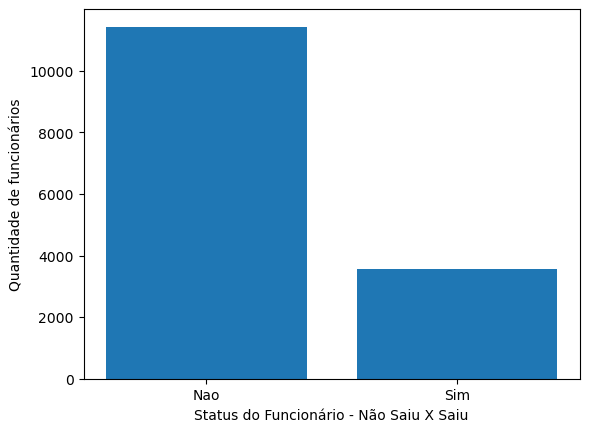

In [19]:
plt.bar(left_count.index.values, totais)
plt.xlabel('Status do Funcionário - Não Saiu X Saiu')
plt.ylabel('Quantidade de funcionários')
plt.show()

Algumas características podem ser melhor analisadas quando o atributo é mostrado em 2 gráficos de forma complementar, como: Totalização do atributo + Agrupamento pela variável alvo (left). Vamos olhar cada caso.

#### 3.2 - Distribuição de cada Variável

In [11]:
def plot_complementar(feature, rotacionar=False):
    graph = plt.subplots(figsize=(20,20))
    plt.subplot(3, 2, 1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=feature, data=ds_funcionario_temp)
    plt.title('Funcionários')
    if rotacionar:
        plt.xticks(rotation=90, ha='right')
    plt.subplot(3, 2, 2)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=feature, data=ds_funcionario_temp, hue='left')
    plt.title('Funcionários')
    if rotacionar:
        plt.xticks(rotation=90)
    plt.show()

In [12]:
def grafico_densidade(atributo, bandwidth=1.0):
    plt.figure(figsize=(6,4))
    ds_saiu = ds_funcionario_temp[ds_funcionario_temp['left']=='Sim'][atributo]
    ds_ficou = ds_funcionario_temp[ds_funcionario_temp['left']=='Nao'][atributo]

    sns.kdeplot(ds_saiu, label = '- Saiu', shade = True, color = 'r', cut=bandwidth)
    sns.kdeplot(ds_ficou, label = '- Ficou', shade = True, color = 'b', cut=bandwidth)

    plt.xlabel(atributo)

#### 3.2.1 - Number_project

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


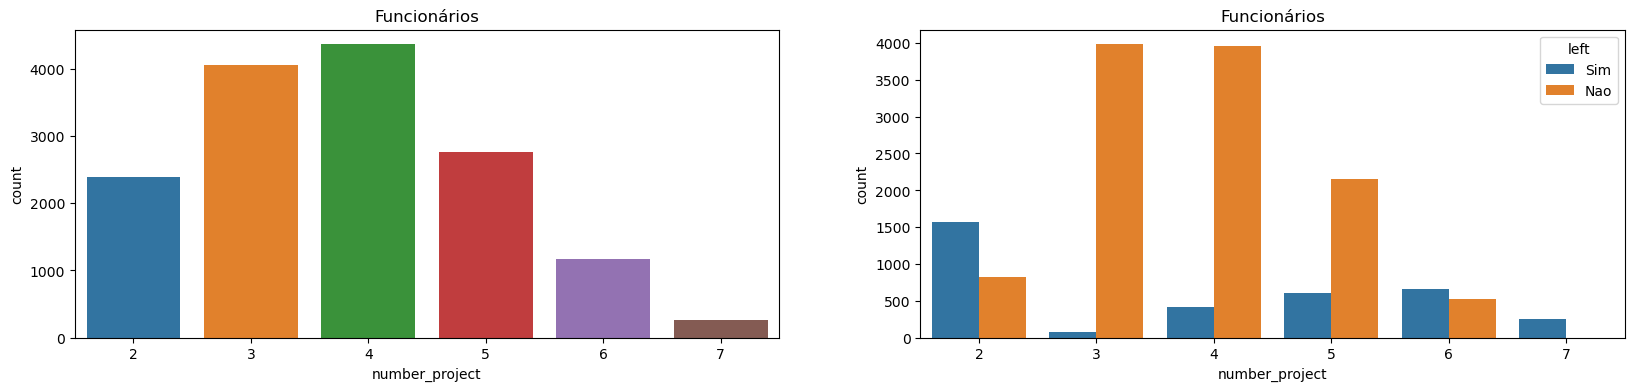

In [22]:
plot_complementar('number_project')

<table>
  <tr><td>Atributos Analisados:</td></tr>
  <tr>
    <td><b>&#10003; number_project</b></td>
    <td>time_spend_company</td>
    <td>promotion_last_5years</td>
  </tr>
  <tr>
    <td>average_montly_hours</td>
    <td>satisfaction_level</td>
    <td>Work_accident</td>
  </tr>
  <tr>
    <td>last_evaluation</td>    
    <td>salary</td>
    <td>department</td>
  </tr>
</table>

Este número isolado pode não revelar algumas questões importantes, como: a quantidade de projetos está ligada ao nível de especialização do funcionário, ao setor, nivel salarial ou experiência?
A maioria dos Funcionários está com 3 a 4 projetos, totalizando mais de 56% do pessoal da empresa.

Se considerarmos funcionários com 3 a 5 projetos, teremos quase 75% do pessoal. Não temos acesso a informações quanto ao impacto financeiro na receita da empresa / ROI desses projetos ou risco de prejuízo, então é dificil avaliar a criticidade da rotatividade sobre eles.

Entretanto, quando os vemos sob a ótica do turnover, funcionários com 2 Projetos, definitivamente, são campeões entre os que deixam a organização. Observar a carga desses projetos mais de perto pode trazer insights sobre diretrizes que guiem políticas para a empresa em geral.
Quais atributos em comum eles possuem? Cabe um estudo de **Cluster Analysis**  para melhor entender o cenário. Entretanto, embora esse dado isolado não seja suficiente para apontar uma causa do comportamento de saída, nos alerta sobre oportunidades de melhorias da Gestão para esse grupo de funcionários na organização, verificação no cumprimento de políticas com o RH, e, principalmente, **enriquecimento de informações ou de métricas coletadas**.

#### 3.2.2 - time_spent_company (em anos)

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


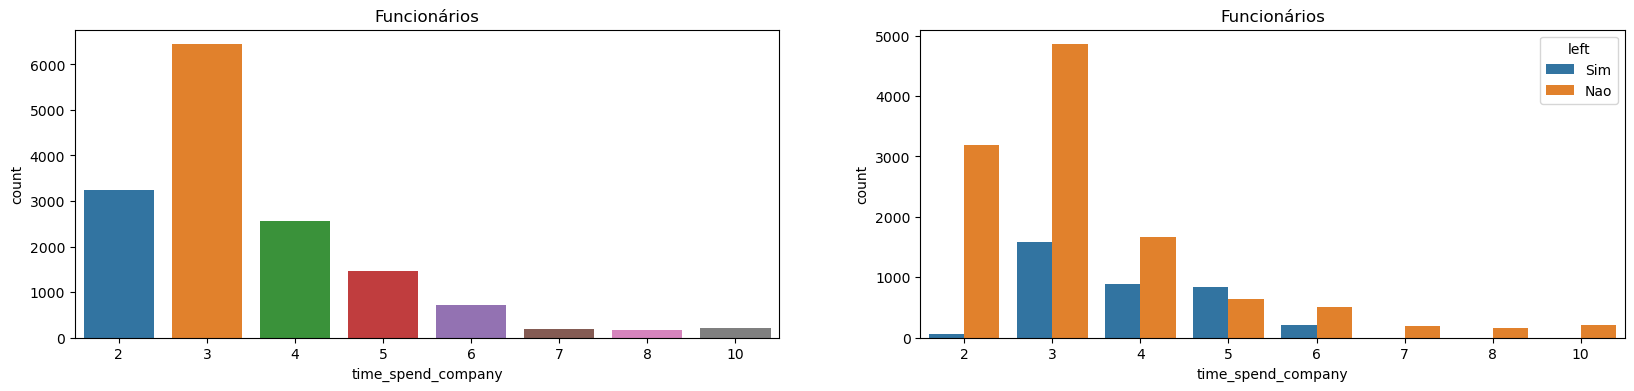

In [23]:
plot_complementar('time_spend_company')

<table>
  <tr><td>Atributos Analisados:</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td><b>&#10003; time_spend_company</b></td>
    <td>promotion_last_5years</td>
  </tr>
  <tr>
    <td>average_montly_hours</td>
    <td>satisfaction_level</td>
    <td>Work_accident</td>
  </tr>
  <tr>
    <td>last_evaluation</td>    
    <td>salary</td>
    <td>department</td>
  </tr>
</table>

Esse atributo traz **um alerta: o 3º ano na empresa é um divisor de águas**. O maior índice de turnover (44,0%) acontece justamente nesse ponto e quase metade dos funcionários se encontram nesse momento da linha do tempo. 
Algumas reflexões:

- Na realidade, analisando o comportamento de turnover, o 3º e o 4º ano de trabalho na empresa podem indicar que o funcionário não encontrou mais espaço para crescimento. Esta falta de horizonte pode estar desacreditando e desestimulando as pessoas a permanecerem na empresa.
- Ao completar **5 anos** de experiência a quantidade de **funcionários que saem supera a quantidade dos que permanecem**. Podemos utilizar o atributo promotion_last_5years para apoiar o pensamento que a política de promoções precisa de atenção urgente? Veremos isso em seguida.

#### 3.2.3 - promotion_last_5years


C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


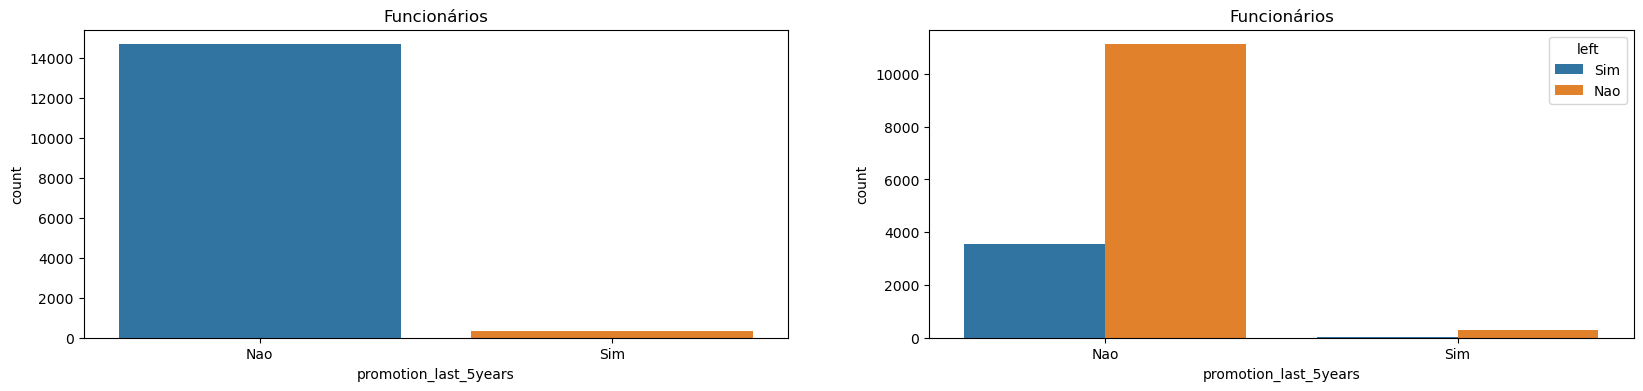

In [24]:
plot_complementar('promotion_last_5years')

<table>
  <tr><td>Atributos Analisados:</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td>&#10003; time_spend_company</td>
    <td><b>&#10003; promotion_last_5years</b></td>
  </tr>
  <tr>
    <td>average_montly_hours</td>
    <td>satisfaction_level</td>
    <td>Work_accident</td>
  </tr>
  <tr>
    <td>last_evaluation</td>    
    <td>salary</td>
    <td>department</td>
  </tr>
</table>

O percentual de funcionários que receberam promoções nos últimos 5 anos é mínimo: 2,17%. Dos que recebram promoção, (319 funcionários) apenas 19 deixaram a empresa - 6,33%. Já entre os que não receberam, 31,92% saíram. Comparando apenas os que saíram, 94,69% não receberam promoção.

Esse aspecto parece ter uma contribuição bem relevante sobre a saída.

#### 3.2.4 - average_montly_hours

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


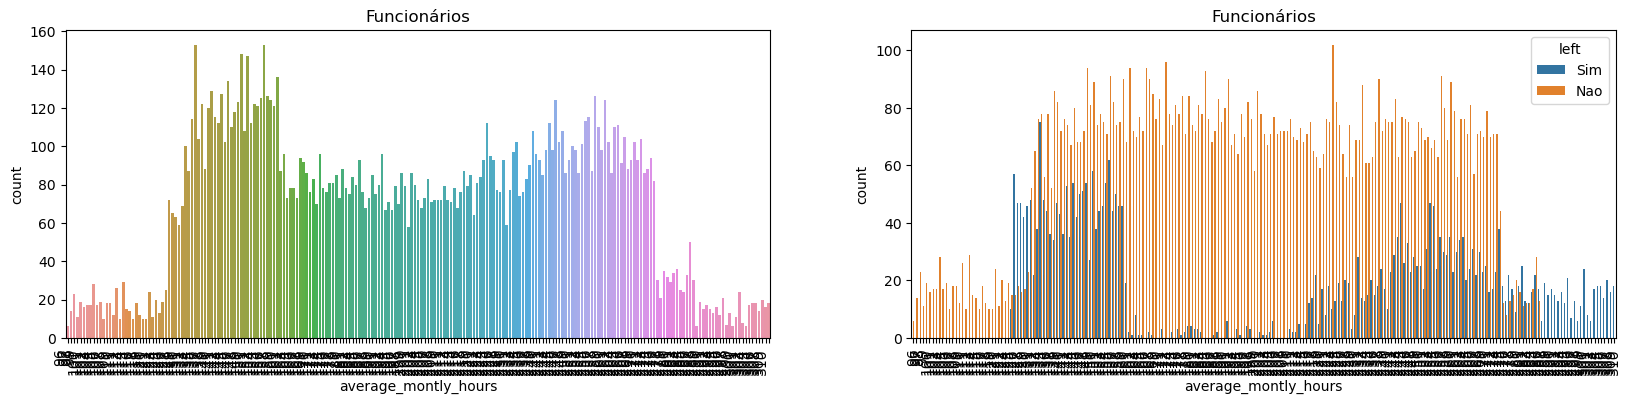

In [25]:
plot_complementar('average_montly_hours', True)

<table>
  <tr><td>Atributos Analisados:</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td>&#10003; time_spend_company</td>
    <td>&#10003; promotion_last_5years</td>
  </tr>
  <tr>
    <td><b>&#10003; average_montly_hours</b></td>
    <td>satisfaction_level</td>
    <td>Work_accident</td>
  </tr>
  <tr>
    <td>last_evaluation</td>    
    <td>salary</td>
    <td>department</td>
  </tr>
</table>

Os valores desse atributo são muito variados, o que não favoreceu a visualização dos valores, pois as horas mensais trabalhadas na empresa varia entre 96 a 310. Uma saída melhor seria segmentar por faixas de valores. 

No gráfico à esquerda, é possível observar que existem praticamente duas áreas (ou "grupos") que concentram a maioria das médias de horas trabalhadas, uma em cada extremidade.

No gráfico à direita, é possível perceber que a maioria dos funcionários que saiu da empresa também está em grupos na mesma posição, mas talvez não seja tão surpreeendente, já que são onde se encontra a maioria do pessoal.

O próximo gráfico, plotado no **Power BI** oferece uma visão mais detalhada e vemos que existe uma propensão forte ao turnover do pessoal que trabalha no grupo de 131 a 161 h e um pouco menos no grupo de 245 a 275 h, mas definitivamente, o grupo que trabalha mais de 285 h não permance na empresa. Talvez existam clusters ligados a funções ou projetos específicos.


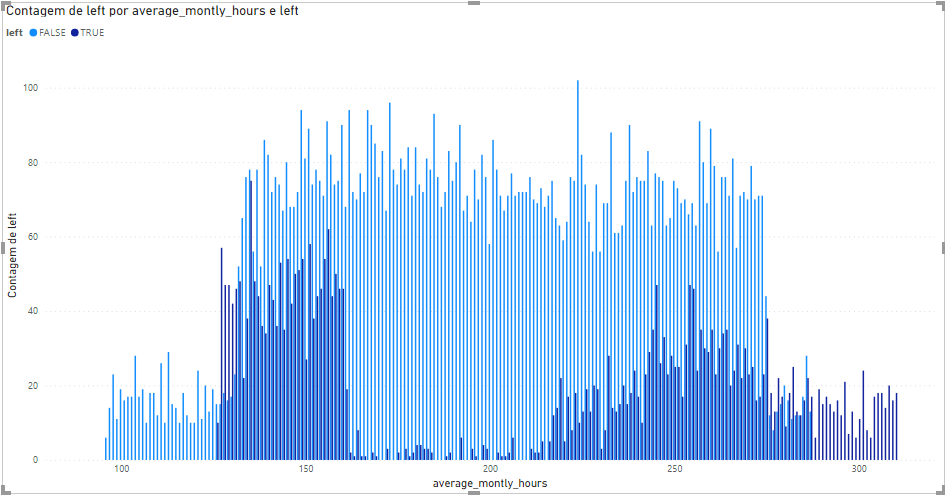

Outra forma de visualização pode ser através da Estimativa de Densidade do Kernel (KDE), que mostra uma vesão contínua e suavizada dos dados, utilizando a distribuição Gausiana de uma variável aleatória contínua (quanto mais suave a curva, menos detalhes individuais dos dados são visíveis, mas a tendência geral da distribuição é mais clara). A Largura de Banda é usada para suavizar os dados. Um valor maior de largura de banda resulta em uma curva mais suave, enquanto um valor menor pode produzir uma curva mais detalhada.

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\1727614376.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ds_saiu, label = '- Saiu', shade = True, color = 'r', cut=bandwidth)
C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\1727614376.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ds_ficou, label = '- Ficou', shade = True, color = 'b', cut=bandwidth)


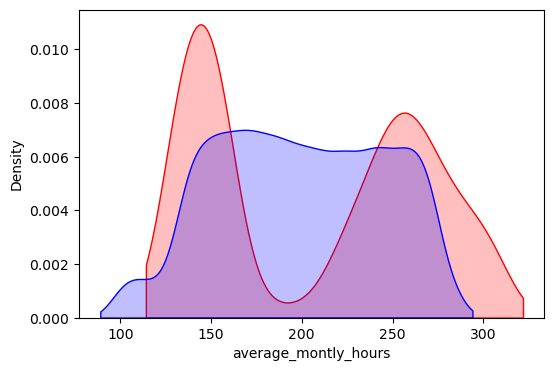

In [26]:
grafico_densidade('average_montly_hours', 1.0)

Existe um intervalo de horas, entre 165 e 220 h, aproximadamente, em que o índice de turnouver é baixo. É preciso cruzar esses dados com o índice de satisfação, cargo, com o salário e eventuais horas-extras a fim de entender melhor o impacto das horas no turnover.

#### 3.2.5 - satisfaction_level

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


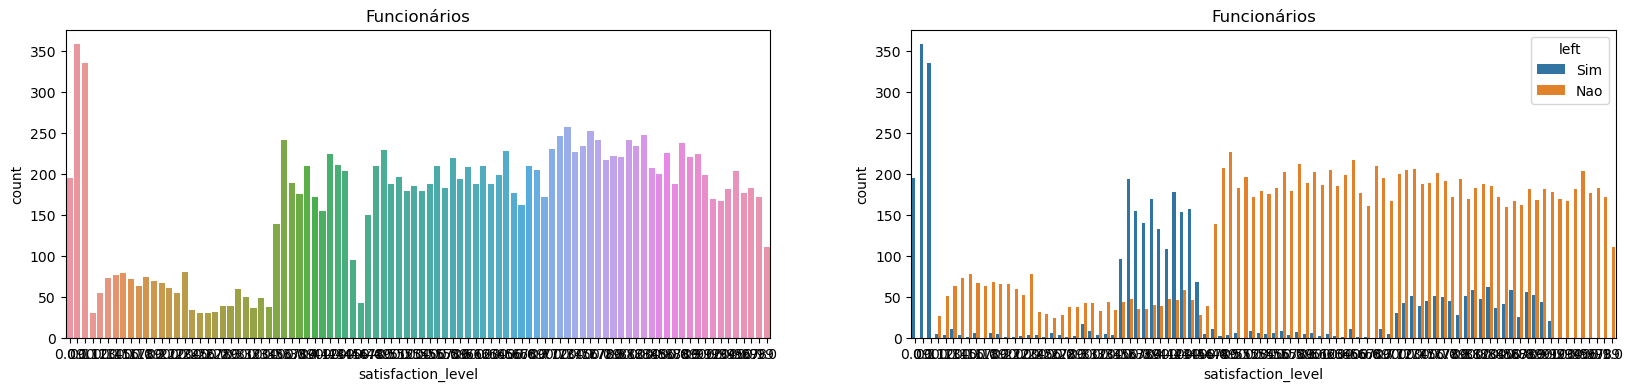

In [27]:
plot_complementar('satisfaction_level')

<table>
  <tr><td>Atributos</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td>&#10003; time_spend_company</td>
    <td>&#10003; promotion_last_5years</td>
  </tr>
  <tr>
    <td>&#10003; average_montly_hours</td>
    <td><b>&#10003; satisfaction_level</b></td>
    <td>Work_accident</td>
  </tr>
  <tr>
    <td>last_evaluation</td>    
    <td>salary</td>
    <td>department</td>
  </tr>
</table>

De forma geral, a maioria dos funcionários se encontram em um bom nível de satisfação, havendo dois grupos que se destacam quanto ao turnover: o mais numeroso em um nível de satisfação baixo (menor que a média) e outro, de menor volume, numa posição de satisfação alta.

#### 3.2.6 - Work_accident

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


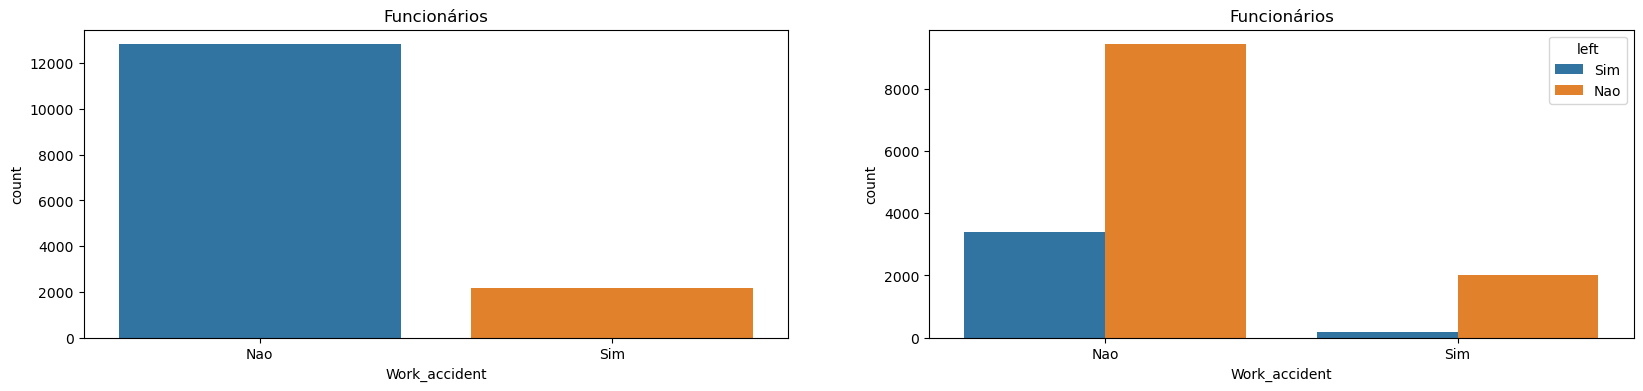

In [28]:
plot_complementar('Work_accident')

In [29]:
#A tabela de Quantidade de Saída de Funcionários(linhas) X Acidente de Trabalho(colunas).  
pd.crosstab(ds_funcionario_temp["Work_accident"],ds_funcionario_temp["left"],margins=True)

left,Nao,Sim,All
Work_accident,,,
Nao,9428,3402,12830
Sim,2000,169,2169
All,11428,3571,14999


<div>
<table>
  <tr><td>Atributos</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td>&#10003; time_spend_company</td>
    <td>&#10003; promotion_last_5years</td>
  </tr>
  <tr>
    <td>&#10003; average_montly_hours</td>
    <td>&#10003; satisfaction_level</td>
    <td>&#10003; <b>Work_accident</b></td>
  </tr>
  <tr>
    <td>last_evaluation</td>    
    <td>salary</td>
    <td>department</td>
  </tr>
</table>
</div>

Vale a pena levantar os números: 14,46% dos funcionários já tiveram ocorrência de Acidente de Trabalho contra 85,54% que não.
Normalmente o índice de acidentes de trabalho é medido anualmente. Neste caso, os dados apresentam um valor contabilizado por funcionários, entretanto, um número próximo a 15% é relativamente alto, podendo indicar que a empresa é de um segmento industrial ou hospitalar, por exemplo.

Avaliando sob a ótica do turnover, 7,79% dos que sofreram algum tipo de acidente deixaram a empresa. É uma proporção baixa e não aparenta impactar na decisão.

#### 3.2.7 - last_evaluation

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


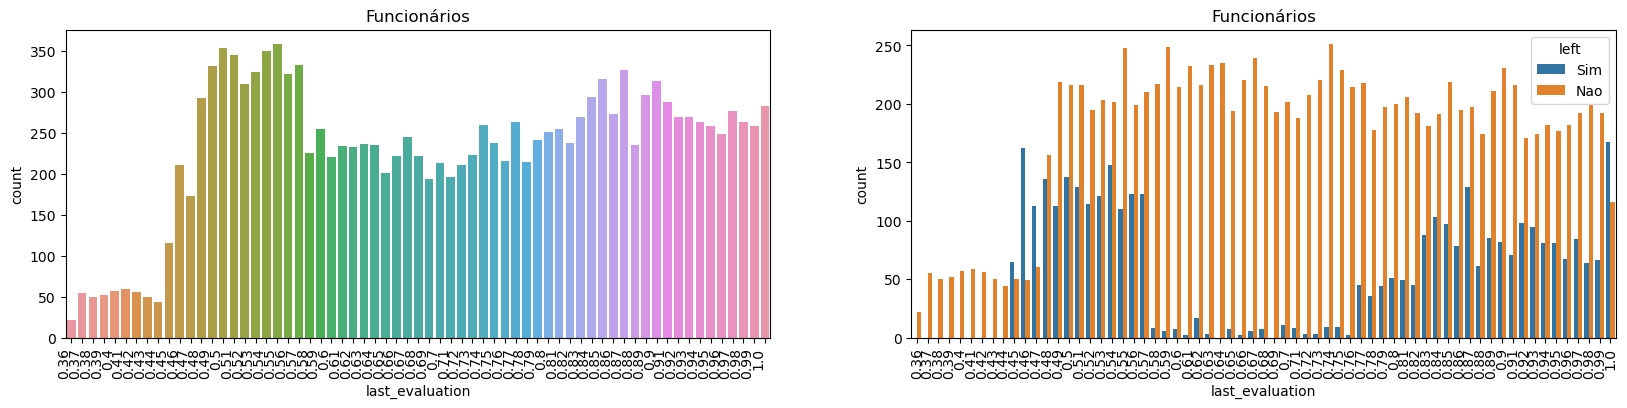

In [30]:
plot_complementar('last_evaluation', True)

<table>
  <tr><td>Atributos</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td>&#10003; time_spend_company</td>
    <td>&#10003; promotion_last_5years</td>
  </tr>
  <tr>
    <td>&#10003; average_montly_hours</td>
    <td>&#10003; satisfaction_level</td>
    <td>&#10003; Work_accident</td>
  </tr>
  <tr>
    <td><b>&#10003; last_evaluation</b></td>    
    <td>salary</td>
    <td>department</td>
  </tr>
</table>


A última Avaliação de Desempenho do funcionário é pontuada com valores de 0,0 a 1,0, sendo a amplitude entre 0,36 e 1.0, média de 0,71 e desvio padrão de 0,17, é provavelmente uma variável com um comportamento contraintuitivo: deveríamos esperar que quanto menor a avaliação, maior a insatisfação da empresa ou do próprio funcionário em sua relação com a empresa?

É curioso notar que a avaliação não segue uma tendência de distribuição normal - o que revelaria um grupo mais numeroso em torno de um desempenho mediano e outros menos numerosos nas extremidades de desempenho. Os dados podem apresentar vieses dependendo da metodologia utilizada e da subjetividade inerente a certos critérios ou mesmo do avaliador.

Mas, olhando pelo aspecto do turnover, existem dois grupos relacionados à saída do funcionário, sendo um na faixa de desempenho 0,46 a 0,57 e outro a partir de 0,77. Mais uma vez, números isolados levantam mais perguntas do que fornecem respostas e outras rodadas de análise precisam ser realizadas.

#### 3.2.8 - Salary

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


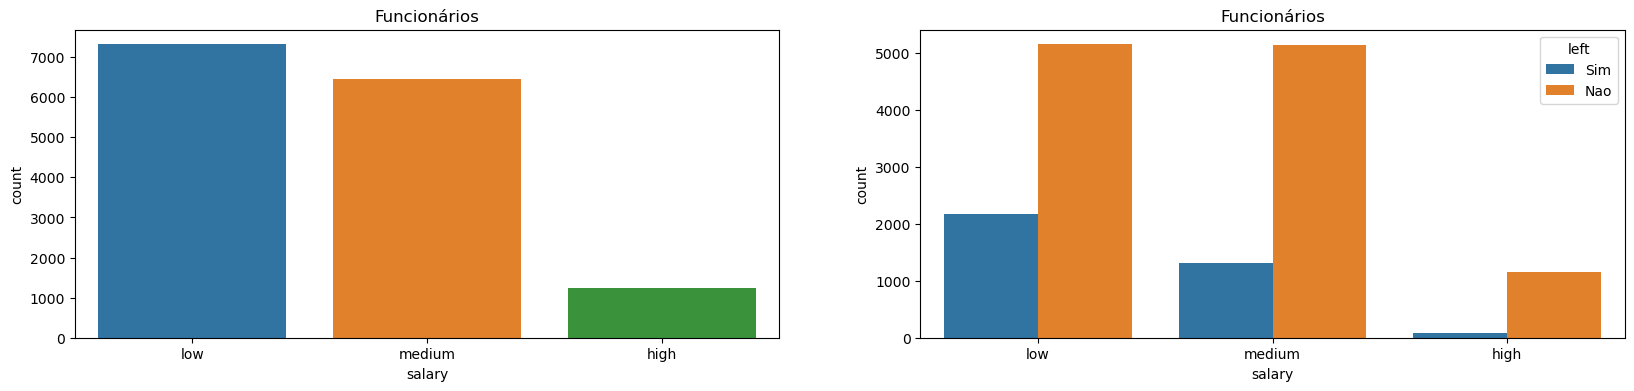

In [31]:
plot_complementar('salary')

<table>
  <tr><td>Atributos</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td>&#10003; time_spend_company</td>
    <td>&#10003; promotion_last_5years</td>
  </tr>
  <tr>
    <td>&#10003; average_montly_hours</td>
    <td>&#10003; satisfaction_level</td>
    <td>&#10003; Work_accident</td>
  </tr>
  <tr>
    <td>&#10003; last_evaluation/td>    
    <td><b>&#10003; salary</b></td>
    <td>department</td>
  </tr>
</table>

Não há muita surpresa aqui. Embora exista uma camada razoável dos salários de nível médios, quase se rivalizando aos de baixo salário quando consideramos o número de funcionários, pode ser uma característica do segmento da empresa. Os altos salários estão em um grupo minoritário.

Quando olhamos o turnover, o maior volume de saídas está nos baixos salários, seguidos por uma quantidade menor nos salários médios e uma quantidade mínima nos altos salários - até por uma questão de proporcionalidade.

#### 3.2.9 - department

C:\Users\eduardo.buarque\AppData\Local\Temp\ipykernel_11940\229224647.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


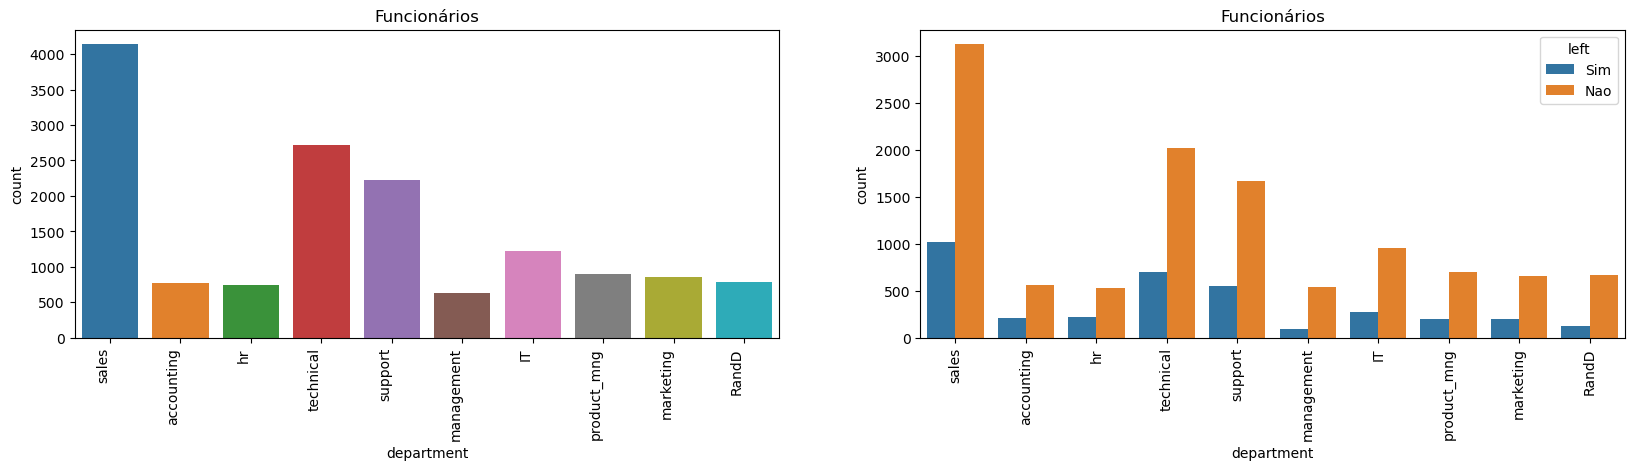

In [32]:
plot_complementar('department', True)

Como os funcionários se distribuem nos departamentos?

In [33]:
#% de funcionários x departamento
ds_funcionario_temp['department'].value_counts()/len(ds_funcionario_temp)*100

department
sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: count, dtype: float64

<table>
  <tr><td>Atributos</td></tr>
  <tr>
    <td>&#10003; number_project</td>
    <td>&#10003; time_spend_company</td>
    <td>&#10003; promotion_last_5years</td>
  </tr>
  <tr>
    <td>&#10003; average_montly_hours</td>
    <td>&#10003; satisfaction_level</td>
    <td>&#10003; Work_accident</td>
  </tr>
  <tr>
    <td>&#10003; last_evaluation</td>    
    <td>&#10003; salary</td>
    <td><b>&#10003; department</b></td>
  </tr>
</table>


O Setor da empresa com mais funcionários é Vendas (Sales), com 27,60% do pessoal, seguido por 18.13% no setor Técnico e
14.86% no Suporte, sugerindo que a empresa trabalha com a comercialização de bens de consumo e/ou serviço. Mas, a rotatividade de pessoal não varia tão significativamente por setor e de forma geral segue uma proporcionalidade em torno dos 20% em qualquer um.

Encerramos as análises das variáveis considerando seu comportamento no conjunto de dados e em relação ao turnover. Mas, ainda podemos tentar achar informações sobre a correlação entre as colunas numéricas. Um "mapa de calor" dessas correlações costuma mostrar quais são mais relevantes.

##### Mapa de Calor da Correlação

<Axes: >

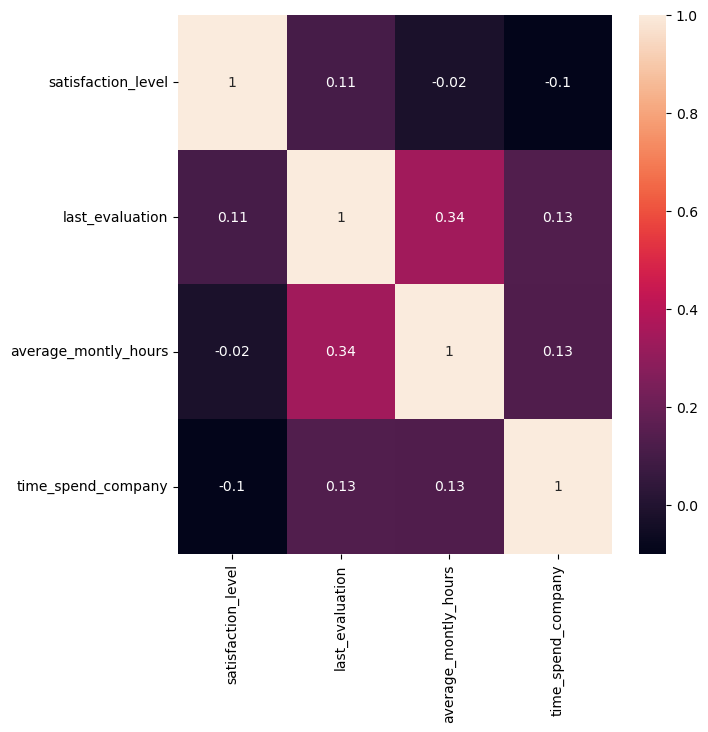

In [13]:
colunas_correlacao = ['satisfaction_level',	'last_evaluation', 'average_montly_hours','time_spend_company']
correlacoes = ds_funcionario_temp[colunas_correlacao].corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(correlacoes, annot=True)

Todas as Correlações apresentam valores absolutos inferiores a 0,40 (são baixas), indicando que esses atributos não possuem forte correlação.


### 3.2.10 - Analise de Clusters
Qual o impacto da Satisfação e da Análise de Desempenho no turnouver da empresa? E a carga de horas médias trabalhadas mensalmente ou o tempo de experiência? Vamos procurar Perfis de funcionários no grupo de turnover.

Estas **análises** serão feitas apenas sobre os **funcionários que saíram**. Em que partes do gráfico os valores concentram
mais pontos?

In [14]:
from sklearn.cluster import KMeans

def analisa_clusters(dataset, feature1, feature2, num_cluesters):
    left_emp = dataset[[feature1, feature2]][dataset.left=='Sim']
    kmeans = KMeans(n_clusters=num_cluesters, random_state=0).fit(left_emp)

    left_emp['label'] = kmeans.labels_

    plt.scatter(left_emp[feature1], left_emp[feature2], c=left_emp['label'], cmap='Accent')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Grupos de funcionários que saíram')
    plt.show()

C:\Desenv\Tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


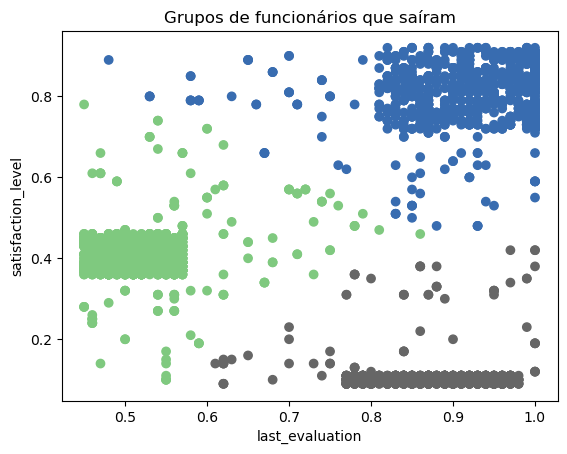

In [39]:
analisa_clusters(ds_funcionario_temp, 'last_evaluation', 'satisfaction_level', 3)

Depois de alguns testes, observamos que 3 grupos representam melhor os perfis desta análise:
* Os funcionários com **alta Satisfação e alto Desempenho** (azul) desfruram da melhor situação, apesar de ser **grupo mais numeroso a deixar a empresa**. Entretanto, essa idéia parece contra-intuitiva e deve haver outra variável que explique melhor esse comportamento;
* Satisfação baixa a moderada e Desempenho médio / alto (cinza), é o grupo que se esforça, mas não está satisfeito - menor volume de saída;
* Satisfação baixa a moderada e Desempenho médio a baixo (verde), são do grupo dos que não trabalham bem e estão razoavelmente satisfeitos. É o grupo de volume intermediário.

C:\Desenv\Tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


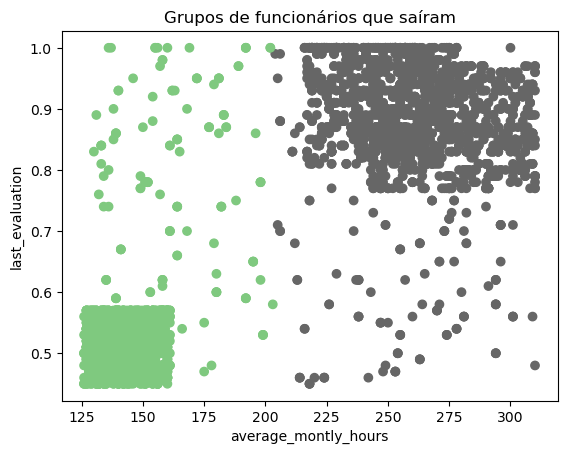

In [40]:
analisa_clusters(ds_funcionario_temp,'average_montly_hours', 'last_evaluation', 2)

Dois Grupos representam bem esse perfil:
- Os que trabalham muito e tiveram ótima avaliação de desempenho, mas são os que mais saíram da empresa. O problema são os critérios de avaliação ou a alta carga horária mensal?;
- Os que trabalham menos ou razoavelmente, e que não são bem avaliados. Pode haver impacto no salário devido à baixa carga horária ou mal-estar devido a falta de engajamento na empresa (avaliação com baixa performance).

C:\Desenv\Tools\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


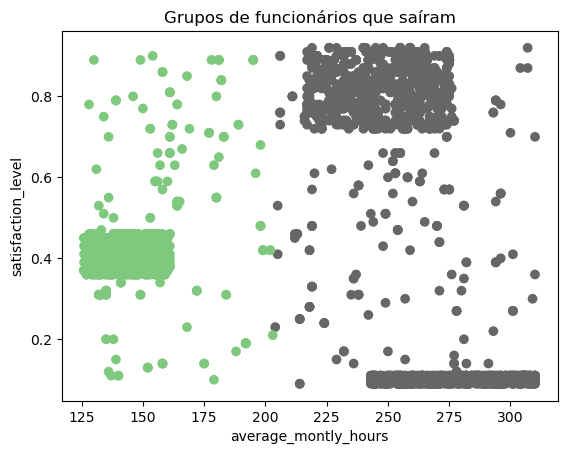

In [44]:
analisa_clusters(ds_funcionario_temp, 'average_montly_hours', 'satisfaction_level', 2)

Entre as tentativas de encontrar grupos mais "coesos", 2 clusters parece ser a melhor escolha. 

Quando analisamos anteriormete os gráficos de barras do grupo de turnover para *average_montly_hours*, havia 3 grupos principais: "131 a 161 h (...) 245 a 275 h, (...) grupo que trabalha mais de 285 h". Quando analisamos o satisfaction_level, havia um grupo mais numeroso de baixa satisfação e outro menor com um nível de satisfação alto.

Quando cruzamos essas duas informações percebemos que o perfil mais representativo é o de alta carga horária. Mais surpreendente é que mesmo com alta satisfação, existe um grande movimento de saída e "carga horária" é algo a ser investigado. A concentração de saída, quando a carga horária é pequena (novamente, talvez refletindo em um baixo salário?), está mais relacionada à média satisfação. Por isso, estudar melhor a quantidade de horas trabalhadas pode ser uma oportunidade.

Altas cargas de trabalho podem estar relacionadas à processos ineficientes, baixa qualidade de produção/prestação de serviço (exigindo retrabalhos) ou metas altas de desempenho (vendas, por exemplo), o que reflete na empresa como um todo.

### 4 - Criando o Modelo Preditivo
---

Estamos trabalhando em um problema típico de Machine Learning para Predição (Classificação) Supervisionada.

Para efeitos de análise utilizamos o conjunto de dados ainda sem a adequação necessária ao processamento dos algorítmos de Machine Learning - que muito frequentemente aceitam apenas valores numéricos e rejeitam atributos com valores ausentes. Consequentemente, a transformação de categorias em números torna-se necessária, assim como a verificação se todos os campos estão preenchidos. Para codificação usaremos algumas estratégias disponíveis nas bibliotecas Python, como Label Encoding e One-Hot Encoding.

Outra característica necessária é que esses valores não estejam muito distantes em escala entre um atributo e outro. Mais uma vez, utilizaremos uma ténica de normalização disponível: MinMaxScaler.

Em seguida, particionaremos a base em Treino e Teste de forma que possamos fazer o Modelo aprender com os dados de Treino e avaliamos o desempenho dele com os dados de Teste.

A coluna que identifica de forma única um funcionário (ID) foi originalmente eliminada assim como seu nome (anonimizada), por ser irrelevante para uso em análise e predição e por questões de legislação (LGPD).

Vamos nos certificar que não existem valores ausentes no conjunto de dados, caso contrário poderá ser necessário usar técnicas de preenchimento ou remoção dos valores - seja da amostra (registro), seja do atributo (coluna) como um todo.

In [45]:
#Algum valor nulo?
ds_funcionarios.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

#### 4.1 - Tratamento do Conjunto de Dados - Feature Engineering

##### 4.1.1 - Enconding

Utilizaremos o OneHot, ou seja, a técnica em que cada atributo categórico irá gerar uma nova coluna no conjunto de dados para cada valor distinto que possui (na realidade, n-1 para não ter redundância) e a nova coluna receberá um valor binário [0 / 1]: 1, caso o valor da coluna corresponda ao "valor original" ou 0, em caso contrário. Essa técnica evita que um atributo categórico ganhe uma "atribuição" numérica/aritmética a ser utilizada pelo algorítmo.

Existem outras abordagens quando o número de colunas do conjunto de dados cresce muito, causando a alta dimensionalidade que, por sua vez, iria requerer outros tratamentos. Aqui não chegaremos a uma quantidade preocupante e por isso manteremos a simplicidade.

In [15]:
print(ds_funcionarios.shape)
ds_hr_encoded = preparador.tratamento_encoder(ds_funcionarios)
print(ds_hr_encoded.shape)

(14999, 10)
(14999, 19)


#### 4.1.2 - Particionamento dos dados em Treino e Teste
Inicialmente podemos separar a coluna que é o interesse da classificação (variável dependente "left") das colunas preditoras (as demais variáveis independentes). Depois, utilizamos a téncica de Split para Treino e Teste

Observando os dados do conjunto final vemos que, por exemplo, comparando os valores de atributos como satisfaction_level e average_montly_hours, vemos uma diferença razoável de escala: enquanto Nível de Satisfação pode ter valores como 0,09 a Carga Hoária Mensal pode chegar a 310. Essas diferenças de escala *podem* (depende dos algorítmos e técnicas utlizadas) interferir na performance assertiva do modelo.

Como estamos numa fase de avaliação dos algorítmos, vale a pena utilizar a normalização de valores e assim ficarmos livres para experimentação. A técnica que utilizaremos envolve o redimensionamos os dados numéricos do intervalo original para que todos os valores se encaixem num intervalo de 0 e 1.


In [16]:
ds_X, ds_y = preparador.compondo_datasets_x_y(ds_hr_encoded, ds_funcionarios)

In [17]:
ds_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   0                      14999 non-null  float64
 7   1                      14999 non-null  float64
 8   2                      14999 non-null  float64
 9   3                      14999 non-null  float64
 10  4                      14999 non-null  float64
 11  5                      14999 non-null  float64
 12  6                      14999 non-null  float64
 13  7                      14999 non-null  float64
 14  8                      14999 non-null  float64
 15  9 

O Encoder gerou colunas com rótulos de 0 a 18. Para que não haja problemas com os algoritmos, vamos renomeá-las de forma automatizada, colocando o prefixo "encoder" + o número gerado:

In [18]:
#Renomeando as colunas após o OneHot Encoder
novas_colunas = {coluna_atual: f'encoder{coluna_atual}' for coluna_atual in ds_X.columns[6:]}
colunas_inciais = list(ds_X.columns[:6])
colunas_dataset = colunas_inciais + list(map(lambda coluna: coluna, novas_colunas.values()))

ds_X.columns = colunas_dataset
ds_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   promotion_last_5years  14999 non-null  int64  
 6   encoder0               14999 non-null  float64
 7   encoder1               14999 non-null  float64
 8   encoder2               14999 non-null  float64
 9   encoder3               14999 non-null  float64
 10  encoder4               14999 non-null  float64
 11  encoder5               14999 non-null  float64
 12  encoder6               14999 non-null  float64
 13  encoder7               14999 non-null  float64
 14  encoder8               14999 non-null  float64
 15  en

##### Split do Dataset
Dividindo o Dataset para o treinamento e validação inicial

In [24]:
proporcao_teste = 0.3
X_treino, X_teste, y_treino, y_teste = train_test_split(ds_X, ds_y, test_size=proporcao_teste, random_state = 58)

In [25]:
# Executamos a normalização depois do Split a fim de não trazer variações do futuro (em teste) para o modelo. Com isso, criamos uma versão mais
# robusta e se a distribuição muda em Teste, reavaliamos o dataset, verificamos ordenação ou cronologia, o balanceamento dos dados, etc.
X_treino = preparador.executa_min_scaler(X_treino)
X_teste = preparador.executa_min_scaler(X_teste)

### 4.2 - Algoritmos Preditivos
#### 4.2.1 - Baseline - Começando com Regressão Logística
Estamos estudando uma solução que nos leve ao melhor resultado, utilizando determinados recursos - sejam técnicos, sejam computacionais, sejam de projeto.

Conjuntos de Dados possuem características que juntamente com o problema a resolver influenciam na escolha do algorítimo e para processá-las em busca da solução utilizaremos esses recursos.

Vamos traçar uma "linha inicial" utilizando um modelo sem grande complexidade e avaliar o resultado. Poderíamos começar com um Gausian Naive Bayes, mas vamos dar um passo adiante e aplicar Regressão Logística, avaliar sua performance e pensar em como evoluímos para outros modelos de acordo com o resultado.
Regressão Logística é uma ténica interessante para casos como o nosso em que queremos prever a probabilidade de ocorrer um de dois valores possíveis.

Obs.: O algoritmo usa por default a técnica de regularização L2 para balancear a capacidade de generalização e evitar overfiting.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBClassifier

In [27]:
class ModelosPreditivos():
  def logistic_regression(self, dataset_x_treino, dataset_y_treino, dataset_X_test):
    modeloRegressaoLogi = LogisticRegression()
    modeloRegressaoLogi.fit(dataset_x_treino, dataset_y_treino)
    y_pred_regressao_logi = modeloRegressaoLogi.predict(dataset_X_test)
    return y_pred_regressao_logi

  def KNN(self, dataset_x_treino, dataset_y_treino, dataset_X_test):
    model_knn = KNeighborsClassifier(n_neighbors=2)
    model_knn.fit(dataset_x_treino, dataset_y_treino)
    predic_knn = model_knn.predict(dataset_X_test)
    return predic_knn

  def SVM (self, dataset_x_treino, dataset_y_treino, dataset_X_test, kernel_type, shape, regularizacao_C=1.0, gamma_coef='scale', degree_poly=3):
    modelo_svm = SVC(kernel=kernel_type, C=regularizacao_C, decision_function_shape=shape, gamma=gamma_coef, degree=degree_poly).fit(dataset_x_treino, dataset_y_treino)
    predicao_svm = modelo_svm.predict(dataset_X_test)
    return predicao_svm

  def grid_search_svm(self, grid_parametros, dataset_x_treino, dataset_y_treino, dataset_X_test):
    grade = GridSearchCV(SVC(), grid_parametros, refit = True, verbose = 0)
    grade.fit(dataset_x_treino, dataset_y_treino)
    print(grade.best_params_)
    print(grade.best_estimator_)
    predicao_grade_svm = grade.predict(dataset_X_test)
    return predicao_grade_svm

  def XGBoost(self, dataset_x_treino, dataset_y_treino, dataset_X_test):
    modelo_xgboost = XGBClassifier(dataset_x_treino, dataset_y_treino, dataset_X_test)
    modelo_xgboost.fit(dataset_x_treino, dataset_y_treino)
    pred_xgboost = modelo_xgboost.predict(dataset_X_test)
    return pred_xgboost

In [28]:
modelosPreditivos = ModelosPreditivos()

In [29]:
y_pred_reg_logi = modelosPreditivos.logistic_regression(X_treino, y_treino, X_teste)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

A validação do resultado também é, em si, uma ciência.

Existem várias métricas que precisam ser avaliadas na hora de verificar a performance de um modelo de __classificação__, mas basicamente partimos de uma Matriz de Confusão e olhamos os seguintes aspectos das classificações:

- Positivas corretas (TP ou Positivos verdadeiros);
- Negativas corretas (TN ou Negativos verdadeiros);
- Positivas incorretas (FP po Falsos positivos);
- Negativas incorretas (FN ou Falsos negativos);
- Acurácia: (TP + TN) / Total
- Precisão: TP / Total
- Recall: TP / (TP + FN)


In [31]:
def imprime_acuracia(predicao, yTeste):
  print('Acurácia: {} %'.format( accuracy_score(predicao, yTeste)*100 ))
  print('Relatorio sw Classificacao: \n', classification_report(yTeste, predicao>0.5))

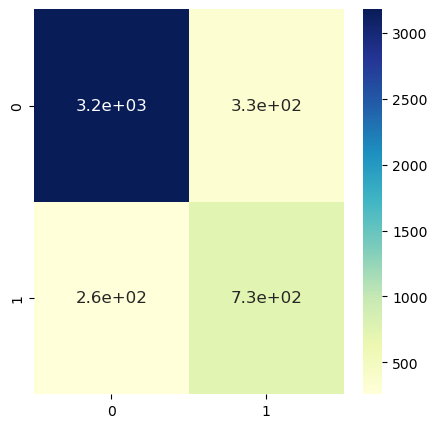

In [32]:
conf_matx = confusion_matrix(y_pred_reg_logi, y_teste)
plt.figure(figsize = (5,5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12}, cmap="YlGnBu")
plt.show()

In [33]:
imprime_acuracia(y_pred_reg_logi, y_teste)

Acurácia: 86.91111111111111 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      3437
           1       0.74      0.69      0.71      1063

    accuracy                           0.87      4500
   macro avg       0.82      0.81      0.81      4500
weighted avg       0.87      0.87      0.87      4500



Nosso **baseline** começou com uma **acurácia de 86,91%** no modelo preditivo. Não é tão ruim, mas nosso objetivo é aumentar a taxa de acerto através de experimentação com outros algorítmos e otimização dos mesmos trabalhando o conjunto de dados ou os parâmetros de entrada do algorítimo: são os hiperparâmetros, que atuam em aspectos do processo de treinamento.

#### 4.2.2 - KNN

In [34]:
predicao_knn = modelosPreditivos.KNN(X_treino, y_treino, X_teste)
imprime_acuracia(predicao_knn, y_teste)

Acurácia: 95.84444444444445 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3437
           1       0.92      0.91      0.91      1063

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



Sensível melhora no resultado preditivo: **95,84%**

#### 4.2.3 - SVM

Realizamos testes nos Kernels fornecidos na bliblioteca do sklearn.svm com valores típicos dos hiperparâmetros e o Kernel Polinomial obteve a melhor perfirmance:

In [64]:
predicao_svm1 = modelosPreditivos.SVM(X_treino, y_treino, X_teste, 'linear', 'ovo')
predicao_svm2 = modelosPreditivos.SVM(X_treino, y_treino, X_teste, 'rbf', 'ovo',gamma_coef=1.0)
predicao_svm3 = modelosPreditivos.SVM(X_treino, y_treino, X_teste, 'poly', 'ovo', degree_poly=5)
predicao_svm4 = modelosPreditivos.SVM(X_treino, y_treino, X_teste, 'sigmoid', 'ovo')

In [66]:
print('Linear----------------------------------')
imprime_acuracia(predicao_svm1, y_teste)
print('RBF----------------------------------')
imprime_acuracia(predicao_svm2, y_teste)
print('Polinomial----------------------------------')
imprime_acuracia(predicao_svm3, y_teste)
print('Sigmoid----------------------------------')
imprime_acuracia(predicao_svm4, y_teste)

Linear----------------------------------
Acurácia: 85.64444444444445 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      3437
           1       0.72      0.65      0.68      1063

    accuracy                           0.86      4500
   macro avg       0.81      0.78      0.79      4500
weighted avg       0.85      0.86      0.85      4500

RBF----------------------------------
Acurácia: 94.73333333333333 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      3437
           1       0.90      0.87      0.89      1063

    accuracy                           0.95      4500
   macro avg       0.93      0.92      0.93      4500
weighted avg       0.95      0.95      0.95      4500

Polinomial----------------------------------
Acurácia: 95.08888888888889 %
Relatorio sw Classificacao: 
               precision    recall  f1-scor

Alguns ajustes nos parâmetros foram feitos e dada a melhoria de performance observada optamos por evoluir a abordagem anterior para um GridSearch.

A variação que observamos em cada modelo se deve aos ajustes de hiperparâmetros que fizemos. É possível gerar uma quantidade limitada de valores para todos os parâmetros desejados e rodar as combinações deles.

#### 4.2.4 - GridSearch com SVM
Portanto, a ideia nessa técnica é criar uma grade de hiperparâmetros, selecionando-os com alguns citérios, e tentar todas as suas combinações. Os parâmetros que queremos combinar são fornecedios em um dicionário com os valores desejados.

Uma advertência: computacionalmente essa estratégia é exigente e quanto mais valores de um determinado hiperparâmetro criamos, aliado à quantidade que combinamos deles, maior o tempo de processamento!

In [67]:
parametros_grid = {'C': [0.1, 1, 10, 100],
                   'gamma': [1, 0.1, 0.01, 0.001],
                   'degree': [2,4,6],
                   'kernel': ['linear','rbf', 'poly', 'sigmoid']}

predicao_grade_svm = modelosPreditivos.grid_search_svm(parametros_grid, X_treino, y_treino, X_teste)

{'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, degree=2, gamma=1)


In [ ]:
imprime_acuracia(predicao_grade_svm, y_teste)
print(classification_report(y_teste, predicao_grade_svm))

Acurácia: 95.82222222222222 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3437
           1       0.90      0.93      0.91      1063

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.94      4500
weighted avg       0.96      0.96      0.96      4500

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3437
           1       0.90      0.93      0.91      1063

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.94      4500
weighted avg       0.96      0.96      0.96      4500



Estes foram os hiperparâmetros definidos como os melhores entre aqueles sugeridos:
{'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

O melhor modelo, portanto, terá os seguintes hiperparâmetros, com acurária de **96,13%**:

In [70]:
modelo_svm = SVC(kernel='rbf', C=1000, decision_function_shape='ovo', gamma=1).fit(X_treino, y_treino)
##predicao_svm3 = modelosPreditivos.SVM(X_treino, y_treino, X_teste, 'rfb', 'ovo', gamma_)
predicao_svm = modelo_svm.predict(X_teste)
imprime_acuracia(predicao_svm, y_teste)

Acurácia: 96.13333333333334 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      3437
           1       0.90      0.94      0.92      1063

    accuracy                           0.96      4500
   macro avg       0.94      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



#### 4.2.5 - XGBoost

É uma categoria de algoritmo baseada em árvores de decisão que utiliza o  algoritmo Gradient Descent para minimizar a perda (loss) enquanto novos modelos vão sendo adicionados.

O XGBoost oferece diversas opções de otimização. Podemos aprofundar o estudo entendendo quais atributos são mais importantes

Acurácia: 98.53333333333333 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3437
           1       0.98      0.95      0.97      1063

    accuracy                           0.99      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500



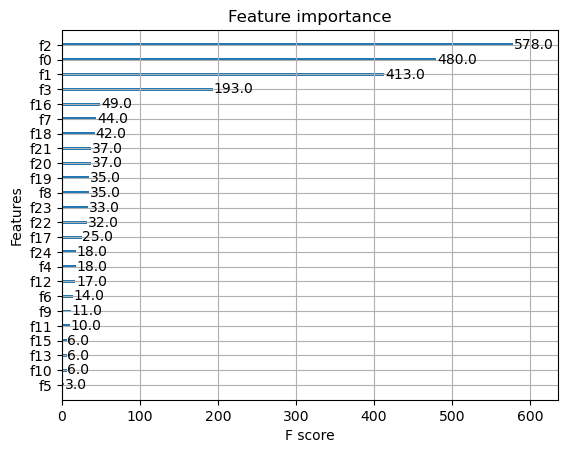

In [35]:
modelo_xgboost = XGBClassifier()
modelo_xgboost.fit(X_treino, y_treino)
pred_xgboost = modelo_xgboost.predict(X_teste)
plot_importance(modelo_xgboost)
imprime_acuracia(pred_xgboost, y_teste)

Vamos utilizar novamente a técnica de GridSearch para combinar um conjunto valores dos hiperparâmetros e avaliar em "uma só rodada" as melhores escolhas.

In [72]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] #eta
n_estimators = [50, 100, 150 ,200]
max_depth = [2, 4, 6, 8, 10]
param_grid = dict(max_depth = max_depth, n_estimators = n_estimators, learning_rate=learning_rate)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(modelo_xgboost, param_grid, scoring='neg_log_loss', n_jobs=-1, cv=kfold)
grid_results = grid_search.fit(X_treino, y_treino)
print('Melhores parâmetros: %f utilizando %s' % (grid_results.best_score_, grid_results.best_params_))

Melhores parâmetros: -0.054537 utilizando {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}


In [ ]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.690025 (0.000037) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 50}
-0.686935 (0.000074) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}
-0.683874 (0.000110) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 150}
-0.680844 (0.000146) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 200}
-0.688749 (0.000053) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 50}
-0.684394 (0.000105) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 100}
-0.680083 (0.000157) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 150}
-0.675813 (0.000209) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 200}
-0.688605 (0.000045) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 50}
-0.684107 (0.000090) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 100}
-0.679654 (0.000134) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 150}
-0.675244 (0.

Acurácia: 98.75555555555555 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3437
           1       0.99      0.96      0.97      1063

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



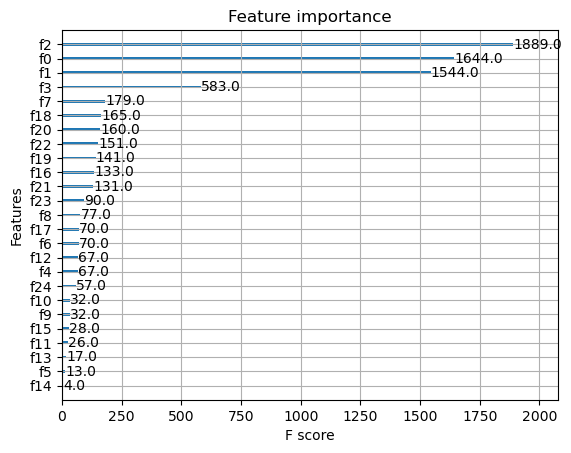

In [36]:
modelo_xgboost = XGBClassifier(max_depth = 10, n_estimators = 150, learning_rate=0.1)
modelo_xgboost.fit(X_treino, y_treino)
pred_xgboost = modelo_xgboost.predict(X_teste)
plot_importance(modelo_xgboost)
imprime_acuracia(pred_xgboost, y_teste)

As 4 primeiras features estão sendo apontadas como as mais relevantes, embora existam outras que também contribuam.

#### 4.2.6 - Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
modeloRandomForest = RandomForestClassifier()
modeloRandomForest.fit(X_treino, y_treino)

RandomForestClassifier()

In [40]:
y_pred_Rand_Frt = modeloRandomForest.predict(X_teste)
imprime_acuracia(y_pred_Rand_Frt, y_teste)
conf_mat_rnd = confusion_matrix(y_pred_Rand_Frt, y_teste)
conf_mat_rnd

Acurácia: 98.95555555555555 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3437
           1       1.00      0.96      0.98      1063

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



array([[3432,   42],
       [   5, 1021]], dtype=int64)

In [41]:
print(classification_report(y_teste, y_pred_Rand_Frt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3437
           1       1.00      0.96      0.98      1063

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(modeloRandomForest, ds_X, ds_y, cv=10)

array([0.99866667, 0.99866667, 0.98133333, 0.97733333, 0.976     ,
       0.994     , 0.99866667, 0.99866667, 1.        , 1.        ])

#### 4.2.7 - Neural Network

In [43]:
import tensorflow as tf

In [44]:
modelo_neural = tf.keras.models.Sequential()
modelo_neural.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(25,)))
modelo_neural.add(tf.keras.layers.Dense(units=128, activation='relu'))
modelo_neural.add(tf.keras.layers.Dropout(0.2))
modelo_neural.add(tf.keras.layers.Dense(units=128, activation='relu'))
modelo_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [45]:
modelo_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36481 (142.50 KB)
Trainable params: 36481 (142.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
modelo_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
epochs = modelo_neural.fit(X_treino, y_treino, epochs=80, batch_size=50)

Epoch 1/80
210/210 [==============================] - 1s 2ms/step - loss: 0.3328 - accuracy: 0.8584
Epoch 2/80
210/210 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9263
Epoch 3/80
210/210 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9474
Epoch 4/80
210/210 [==============================] - 0s 2ms/step - loss: 0.1356 - accuracy: 0.9590
Epoch 5/80
210/210 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9611
Epoch 6/80
210/210 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9634
Epoch 7/80
210/210 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9656
Epoch 8/80
210/210 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9665
Epoch 9/80
210/210 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9694
Epoch 10/80
210/210 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9706

In [48]:
y_pred_neural = modelo_neural.predict(X_teste)

141/141 [==============================] - 0s 998us/step


In [88]:
conf_matx_neural = confusion_matrix(y_teste, y_pred_neural > 0.5)
conf_matx_neural

array([[3386,   51],
       [  57, 1006]], dtype=int64)

In [89]:
print(classification_report(y_teste, y_pred_neural>0.5))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3437
           1       0.95      0.95      0.95      1063

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



In [90]:
imprime_acuracia(y_pred_neural>0.5, y_teste)

Acurácia: 97.6 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3437
           1       0.95      0.95      0.95      1063

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



#### 4.2.8 - DecisionTree

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
%matplotlib inline

def Decision_tree(max_depth_arg=None, min_sample_leaf_arg=2):
    modelo_dtree = DecisionTreeClassifier(max_depth = max_depth_arg, min_samples_leaf=min_sample_leaf_arg, random_state=10).fit(X_treino, y_treino)
    predicao_dtree = modelo_dtree.predict(X_teste)
    imprime_acuracia(predicao_dtree, y_teste)
    return modelo_dtree

In [54]:
mod_tree1 = Decision_tree()

Acurácia: 97.44444444444444 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3437
           1       0.95      0.94      0.95      1063

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



[Text(0.47025450511027433, 0.975, 'x[0] <= 0.412\ngini = 0.364\nsamples = 10499\nvalue = [7991, 2508]'),
 Text(0.21695131791285638, 0.925, 'x[19] <= 0.5\ngini = 0.477\nsamples = 2939\nvalue = [1154, 1785]'),
 Text(0.16171328671328672, 0.875, 'x[0] <= 0.027\ngini = 0.484\nsamples = 1704\nvalue = [1003, 701]'),
 Text(0.15740989779451317, 0.825, 'gini = 0.0\nsamples = 614\nvalue = [0, 614]'),
 Text(0.16601667563206024, 0.825, 'x[24] <= 0.5\ngini = 0.147\nsamples = 1090\nvalue = [1003, 87]'),
 Text(0.16171328671328672, 0.775, 'x[2] <= 0.907\ngini = 0.126\nsamples = 1076\nvalue = [1003, 73]'),
 Text(0.15740989779451317, 0.725, 'x[1] <= 0.992\ngini = 0.114\nsamples = 1068\nvalue = [1003, 65]'),
 Text(0.11256051640667025, 0.675, 'x[0] <= 0.236\ngini = 0.103\nsamples = 1050\nvalue = [993, 57]'),
 Text(0.054061323292092525, 0.625, 'x[0] <= 0.06\ngini = 0.053\nsamples = 656\nvalue = [638, 18]'),
 Text(0.02151694459386767, 0.575, 'x[3] <= 0.062\ngini = 0.134\nsamples = 97\nvalue = [90, 7]'),
 Tex

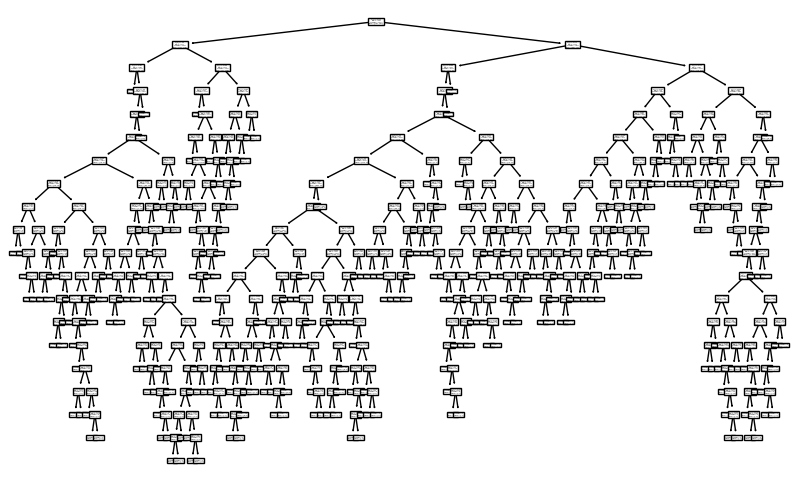

In [96]:
# Nada está ruim, mas vamos ver se é possível melhorar, pois não exploramos alterações nos hiperparâmetros
# Dada uma árvore treinada, vamos olhar o gráfico de tomada de decisão do modelo. Quanto mais profunda a árvore, maior a chance de overfit
# visto que ela irá tentar realizar o split otimizando os pontos de corte e para evitar isso devemos pensar qual a melhor forma de
# não chegar ao aprendizado excessivo dos dados de treino. Uma delas é ajustar a profunidade da árvore ou a quantidade de exemplos no split
plt.figure(figsize=(10,6))
plot_tree(mod_tree1)

Decision_tree(max_depth_arg=8)

In [58]:
# Max_depth e Min_Sample_Leaf
mod_tree2 = Decision_tree(min_sample_leaf_arg=5)

Acurácia: 97.4888888888889 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3437
           1       0.95      0.94      0.95      1063

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.97      4500
weighted avg       0.97      0.97      0.97      4500



In [61]:
mod_tree3 = Decision_tree(max_depth_arg=10)

Acurácia: 97.75555555555555 %
Relatorio sw Classificacao: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3437
           1       0.97      0.93      0.95      1063

    accuracy                           0.98      4500
   macro avg       0.98      0.96      0.97      4500
weighted avg       0.98      0.98      0.98      4500



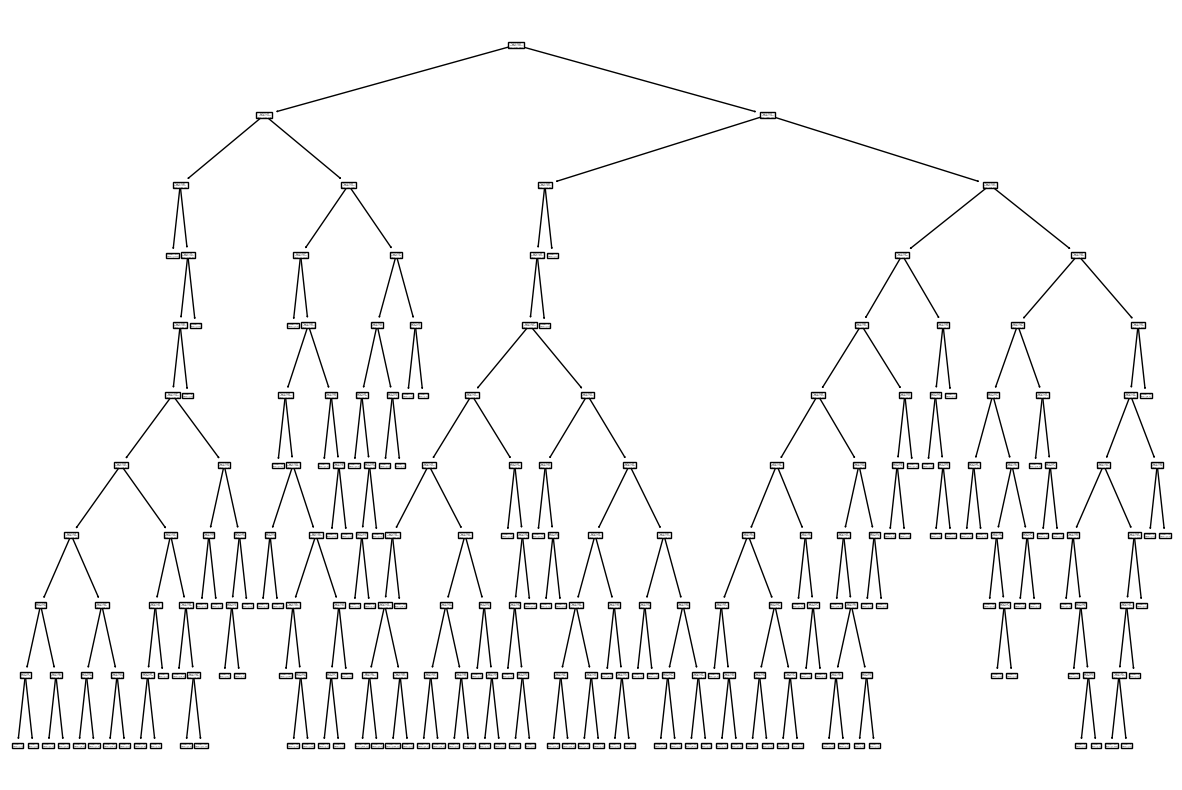

In [65]:
plt.figure(figsize=(15, 10))
plot_tree(mod_tree3)
plt.show()

O melhor resultado alcançado (considerando um intervalo de valores testados nos dois parâmetrtos) foi usando o parâmetro profundidade máxima de 8

### 5 - Considerações
O fato de termos conseguido uma acurácia de 99% é bastante animador, mas ainda não é onde a hsitória acaba: nossa função é atender a uma necessidade de negócio e alterações no ambiente podem alterar como os dados entram, a relação entre seus atributos ou mesmo a distribuição de valores em um mesmo atributo - isso, muito provavelmente afetará os resultados e poderá exigir recalibragem de boa parte do processo.

Para evitar que nosso investimento de recursos seja disperdiçado e que a expectativa do Diretor de RH seja frustrada, uma passo a mais é necessário: o monirotamento e acompanhamento de diversos aspectos desse emgenho.

- Carga Horária: é uma das 
- Faixa Salarial: observamos que nesse aspecto, a

#### 5.1 - Análise
```
Método             Acurácia
Linear Regression: 86.91
KNN:               95.84
SVM:               96.13
XGBoost:           98,80
Random Forest:     98.86
Rede Neural:       97.48
DecisionTree       97,86
```



#### 5.2 - O Modelo Preditivo
Acreditamos que taxas de acerto como as que encontramos, superiores a 98% (XGBoost e Random Forest), são um resultado excelentes do nosso trabalho.

Embora uma grande quantidade de registros e características verdadeiramente representativas da realidade estudada sejam o melhor insumo para modelos preditivos, precisamos ter em mente que nesse caso ela depende diretamente do tamanho da empresa e do tempo.

Caso a performance apresentada fosse insatisfatória, teríamos como alternativas:
- Continuar avaliando e alterando os hiperparâmetros dos algorítimos;
- Procurar algorítimos mais interessantes para esse cenário, com maior ou menor complexidade e/ou flexibilidade;
- Reunir mais amostras de treinamento
- Reunir mais atributos ao conjunto de dados, possivelmente de outras fontes


---

#### 5.3 - Publicando o Modelo Preditivo

O trabalho ainda não acabou. Precisamos disponibilizar uma aplicação que, recebendo novos dados de entrada, avalie e faça a previsão. Para isso, teremos que considerar os seguintes pontos:

**1 - Exportar o Modelo**:
Para um formato compatível com a linguagem de programação que planejamos usar para criar uma API (serviço que se comunica com a aplicação). Ex: Python.

**2 - Configurar um Ambiente de Implantação**:
Local para hospedar seu modelo e sua aplicação (são duas coisas distintas). Por exemplo, ambientes em nuvem com na AWS (Amazon Web Services), Azure (Microsoft Azure), Google Cloud Platform, etc.

**3 - Criar uma API**:
Criar uma API que possa receber solicitações da aplicação e enviar respostas.

**4 - Integrar o Modelo na API**:
Carregar o modelo treinado em nossa API e configurar um endpoint (um serviço de integração) para permitir a comunicação entre a Aplicação e o Modelo. Quando a API receber dados de entrada da aplicação, ela deve usar o modelo para gerar previsões e enviar as previsões de volta como resposta.

**5 - Testar a Implantação**:
Realizar testes para garantir que a API esteja funcionando corretamente. 

**6 - Aderência à LGPD/GDPR**:
Certificar-se de estar em conformidade com as leis de proteção de dados ao lidar com dados sensíveis ou pessoais.

**7 - Segurança**:
Implementar medidas de segurança adequadas, como autenticação e autorização, para proteger sua API e dados.


### 6 - Exportação do Modelo Selecionado

Exportaremos o **Randon Forest** por ser um modelo bastante popular

In [66]:
import joblib

In [67]:
joblib.dump(modeloRandomForest, 'modeloRandomForest.pkl')

['modeloRandomForest.pkl']

Não devemos esquecer que os dados que foram submetidos à predição foram pré-processados e isso precisa ser feito de forma idêntica ao dado que será submetido ao modelo preditivo publicado.

É possível "empacotar" esse processo em um "pipeline", salvá-lo e exportá-lo também. Mas, para simplificar replicaremos os processos na aplicação.